In [1]:
# Import Our Modules

In [2]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 17.8 MB 13.5 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 43.7 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357942 sha256=fc542bee294438ca5813fadda666a7b7a5d229422cca7b54d72beb0975d63a8f
  Stored in directory: /tmp/pip-ephem-wheel-cache-efto0rb8/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=

In [3]:
# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import pandas_profiling

import gc
import datetime

%matplotlib inline
plt.style.use('ggplot')
from urllib.request import urlopen
from zipfile import ZipFile

In [5]:
# Loading Data

In [6]:
zipurl = 'https://raw.githubusercontent.com/itsahmedmohamedamin/Retail-Product-Sales-Analytics/master/E-commerce%20Data.zip'
zipresp = urlopen(zipurl)
tempzip = open("/tmp/tempfile.zip", "wb")
tempzip.write(zipresp.read())
tempzip.close()
zf = ZipFile("/tmp/tempfile.zip")
zf.extractall(path = '')
# close the ZipFile instance
zf.close()

In [7]:
df = pd.read_csv("data.csv", encoding = 'ISO-8859-1')

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
# Cleaning and preprocessing the data

In [11]:
# Checking the missing values

In [12]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [13]:
# change the invoice date to date-time
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [15]:
# Removing all the nan values and add them to df_no_missing
df_no_missing = df.dropna()

In [16]:
df_no_missing.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [18]:
df_no_missing['CustomerID'] = df_no_missing['CustomerID'].astype('int64')

In [19]:
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [20]:
df2 = df_no_missing.copy()

In [21]:
df2.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.00,406829,406829.00,406829.00
mean,12.06,2011-07-10 16:30:57.879207424,3.46,15287.69
min,-80995.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-06 15:02:00,1.25,13953.00
50%,5.00,2011-07-31 11:48:00,1.95,15152.00
75%,12.00,2011-10-20 13:06:00,3.75,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,248.69,NaN,69.32,1713.60


In [22]:
# Removing the Negative Quantities

In [23]:
df2 = df2[df2.Quantity > 0]
df2.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.00,397924,397924.00,397924.00
mean,13.02,2011-07-10 23:43:36.912475648,3.12,15294.32
min,1.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-07 11:12:00,1.25,13969.00
50%,6.00,2011-07-31 14:39:00,1.95,15159.00
75%,12.00,2011-10-20 14:33:00,3.75,16795.00
max,80995.00,2011-12-09 12:50:00,8142.75,18287.00
std,180.42,NaN,22.10,1713.17


In [24]:
# Start Creating new Fields

In [25]:
df2['AmountSpent'] = df2['Quantity'] * df2['UnitPrice']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [26]:
# Let's Add Month, Day and Hour Columns
df2['month_year'] = df2['InvoiceDate'].dt.to_period('M')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [27]:
# Let's Separate each period
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'quarter']
df2 = df2.join(pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in L if i != 'weekofyear'), axis=1))
df2['weekofyear'] = df2['InvoiceDate'].dt.isocalendar().week

In [28]:
df2.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,quarter,weekofyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,4,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,4,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48


In [29]:
df2.dayofweek.unique()

array([2, 3, 4, 6, 0, 1], dtype=int32)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   AmountSpent  397924 non-null  float64       
 9   month_year   397924 non-null  period[M]     
 10  year         397924 non-null  int32         
 11  month        397924 non-null  int32         
 12  day          397924 non-null  int32         
 13  dayofweek    397924 non-null  int32         
 14  dayofyear    397924 non-null  int32         
 15  quarter      397924 non-null  int32    

In [31]:
df2['dayofweek'] = df2['dayofweek'] + 1
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,quarter,weekofyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,4,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,4,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48


In [32]:
# Exploring and Analysing data

In [33]:
# Number of Sales Made per customer for each country
sales_per_customer = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_customer.columns = ['CustomerID', 'Country','NumberOfSales']

In [34]:
sales_per_customer.head(10)

,CustomerID,Country,NumberOfSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


Top Customers: The customer with the CustomerID 17841 from the United Kingdom has the highest number of sales transactions (7847), which is significantly higher than the rest, indicating that this may be a very loyal customer, a reseller, or perhaps a large organization making frequent purchases.

Customer Engagement: There is a wide range in the number of transactions per customer, from 7847 for the top customer to 1637 for the 10th customer on the list. This suggests that there may

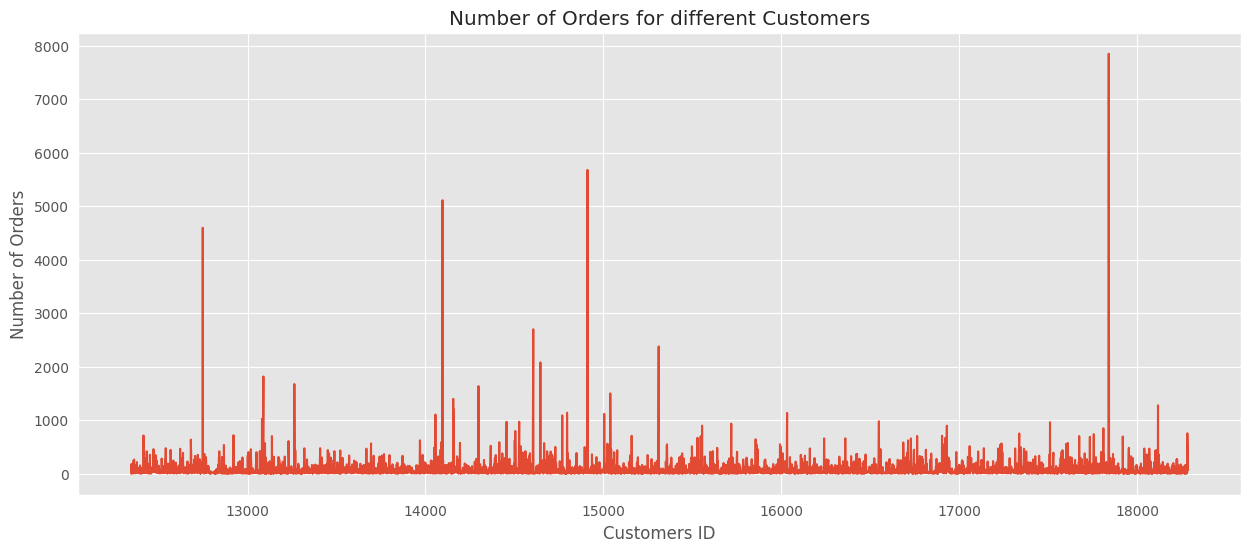

In [35]:
# Visualize No. of Sales for all Customers
orders = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15, 6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

 **Long-Tail Distribution: The distribution of orders per customer seems to follow a long-tail pattern. A small number of customers have a very high number of orders, while the vast majority of customers have a relatively low number of orders.**

**Key Customers: There are a few customers with exceptionally high order counts. These could be key accounts, such as bulk buyers or resellers, given their disproportionate contribution to the number of orders.**

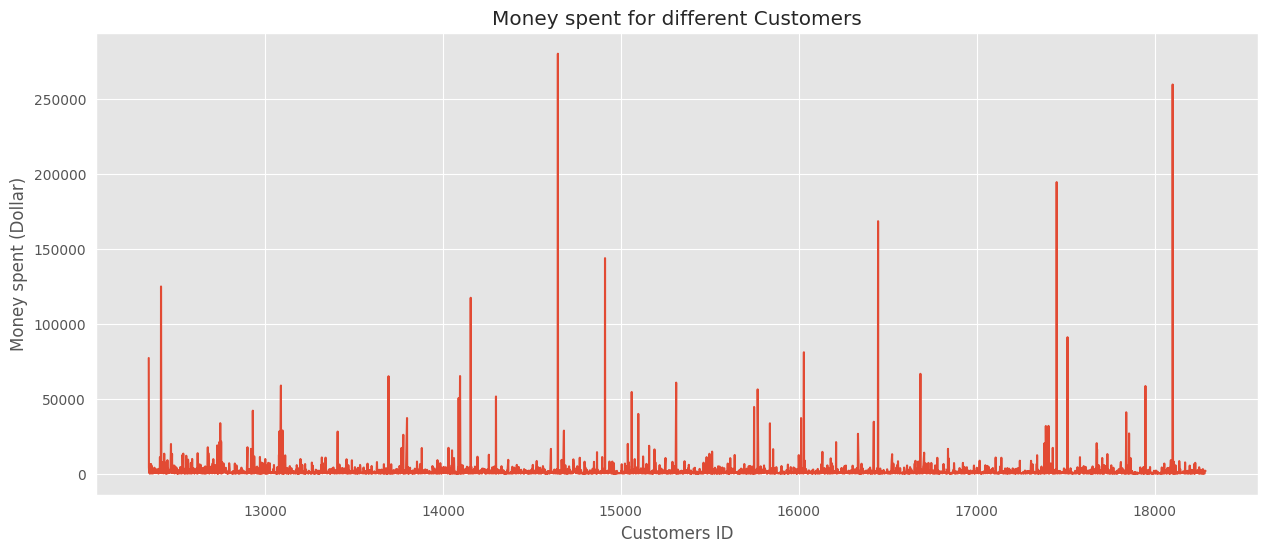

In [36]:
# Visualizing Money Spent for All Customers
money_spent = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum()
plt.subplots(figsize=(15, 6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money spent for different Customers')
plt.show()

**Long-Tail Distribution: The distribution of Money Spent per customer seems to follow a long-tail pattern. A small number of customers have a very high number of Money Spent, while the vast majority of customers have a relatively low number of Money Spent.**

In [37]:
# Number of Total Spent Made per Customer
spent_per_customer = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)
spent_per_customer.columns = ['CustomerID', 'Country', 'TotalSpent']
spent_per_customer.head(10)

,CustomerID,Country,TotalSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


In [38]:
# ADD the year Month adn hour Columns
df2.insert(loc=2, column='year_month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df2.insert(loc=5, column='hour', value=df2.InvoiceDate.dt.hour)

In [39]:
df2.head()

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,quarter,weekofyear
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,4,48
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,4,48
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48


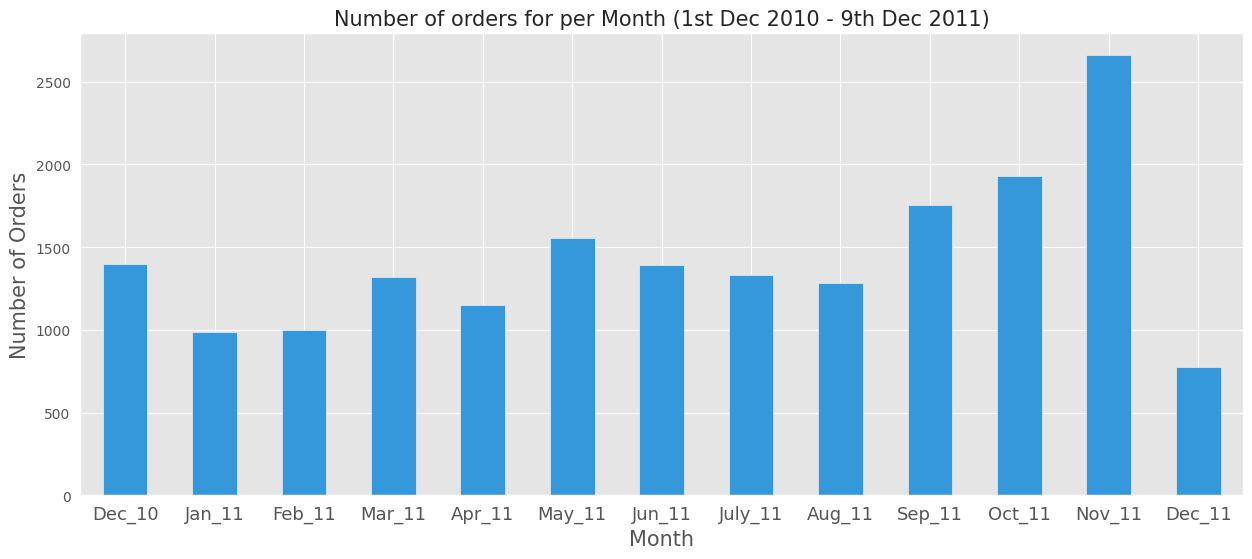

In [40]:
# Visualizing Number of orders per month
ax = df2.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar', color='#3498db', figsize=(15,6))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of orders for per Month (1st Dec 2010 - 9th Dec 2011)', fontsize=15)
ax.set_xticklabels(['Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'], rotation='horizontal', fontsize=13)
plt.show()

**Seasonal Trends: There is a clear peak in the number of orders during November, which could indicate seasonal shopping behavior, possibly due to holiday sales such as Christmas.**

**Lowest Orders at the Start: The lowest number of orders occurred in the starting month (December 2010), which might be due to the data starting partway through the month (1st December) and therefore not representing a full month's data.**

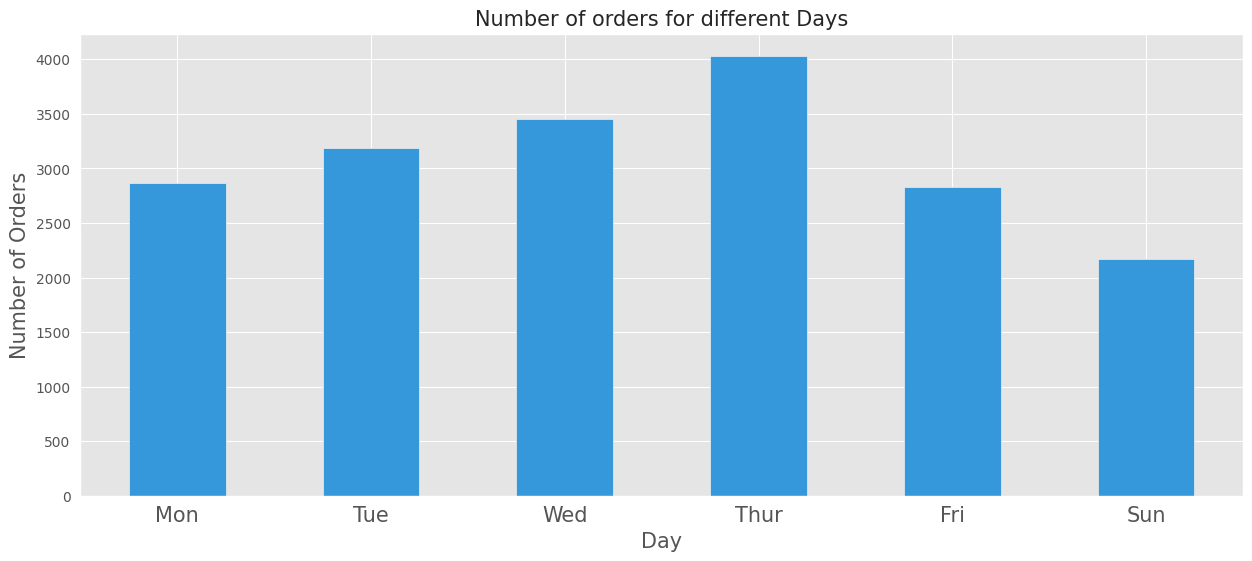

In [41]:
# Visualizing number of orders per day
ax = df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index().plot(kind='bar', color='#3498db', figsize=(15,6))
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of orders for different Days', fontsize=15)
ax.set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sun'), rotation='horizontal', fontsize=15)
plt.show()

**Midweek Peak: Order volume seems to peak midweek, with Wednesday receiving the highest number of orders. This could suggest that customers are more active in the middle of the week when it comes to placing orders.**

**Weekend Drop: There is a noticeable drop in the number of orders on Sunday. This could be due to several factors, such as the business not operating on Sundays, customers being less active, or possibly delayed processing of weekend orders.**

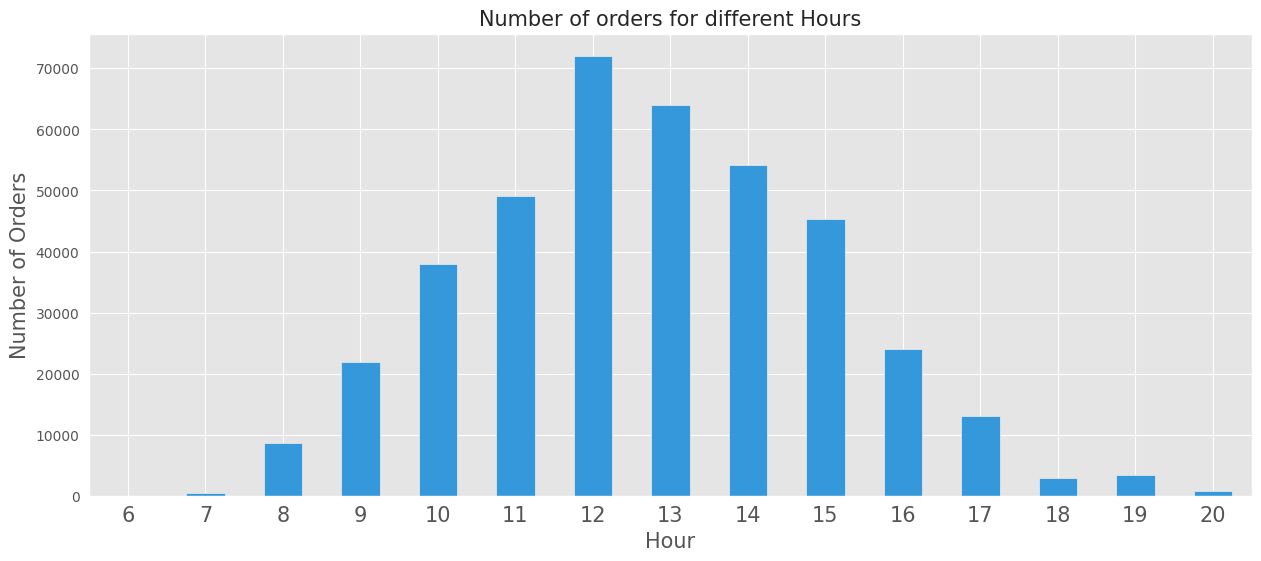

In [42]:
# Visualizing Number of Orders per hour
ax = df2['hour'].value_counts().sort_index().plot(kind='bar', color='#3498db', figsize=(15, 6))
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of orders for different Hours', fontsize=15)
ax.set_xticklabels(range(6, 21), rotation='horizontal', fontsize=15)
plt.show()

**Morning Activity: There's a substantial increase starting from 7 AM, with activity rising significantly from 8 AM onwards. This suggests that business operations need to be fully active by this time to handle the influx of orders.**

**The Activity increases onwards until it reaches it's peek at 12PM and then go downwards**

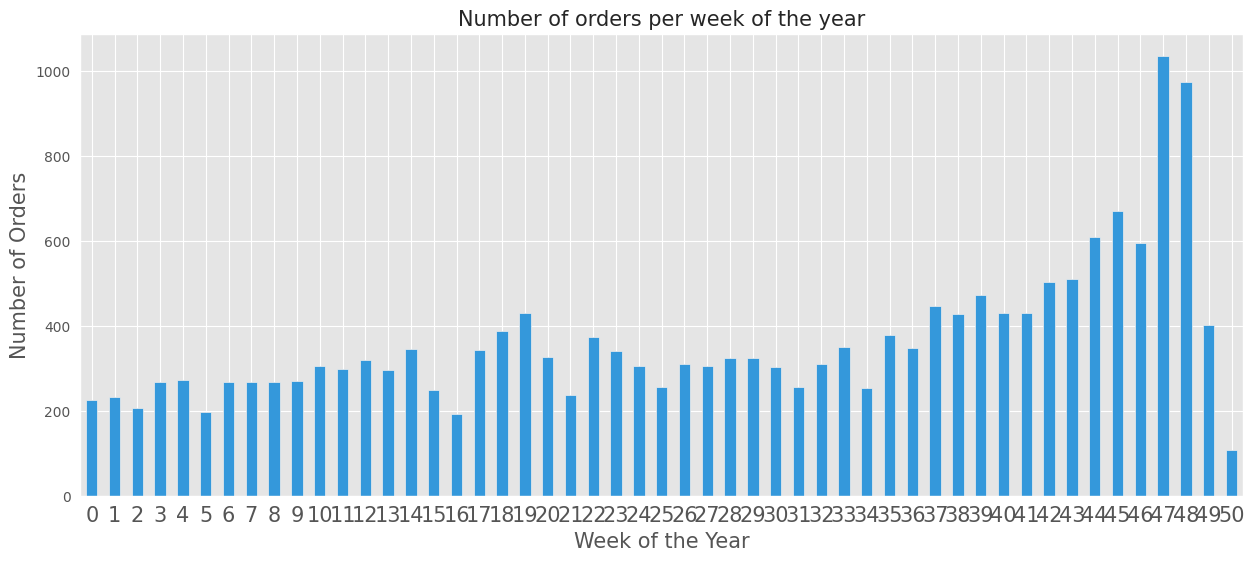

In [49]:
# Visualizing Number of orders per week of the year
orders_per_week = df2.groupby('weekofyear')['InvoiceNo'].nunique()
ax = orders_per_week.plot(kind='bar', color='#3498db', figsize=(15,6))
ax.set_xlabel('Weeks of the Year', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of orders per week of the year', fontsize=15)
# Adjust the range based on actual data, if necessary
ax.set_xticklabels(range(0, 51), rotation='horizontal', fontsize=15)
plt.show()


**Seasonal Trends: There is a noticeable increase in the number of orders towards the end of the year. This spike could represent seasonal shopping behavior, such as holiday or Christmas shopping, which is typical for many retail businesses.**

**Order Volume Variation: Throughout the year, the order volume seems to fluctuate, with some weeks having significantly more orders than others. This variation could be influenced by factors such as promotions, stock availability, holidays, or marketing campaigns.**

**End-of-Year Peak: The highest peak occurs in the last weeks of the year, likely corresponding to the 48th to 51st weeks, which is common in many businesses due to holiday shopping.**

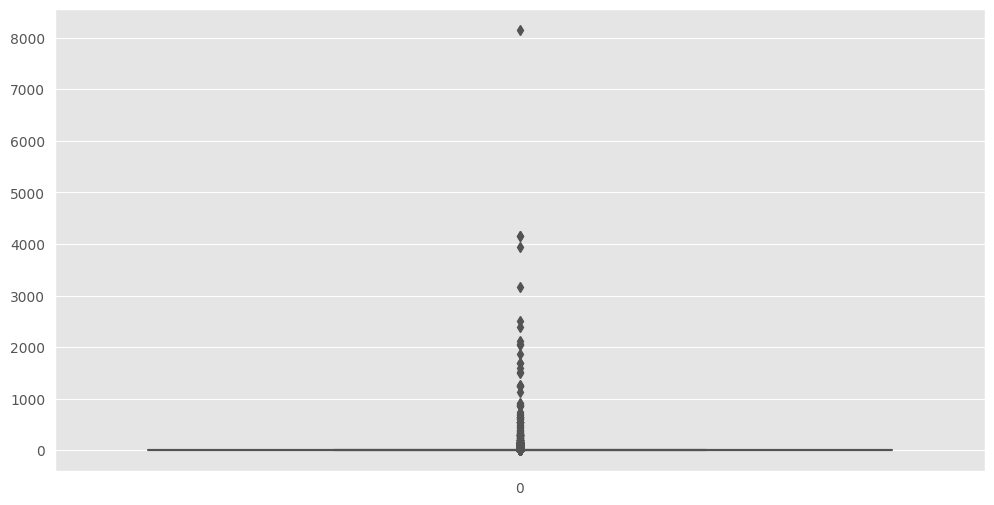

In [51]:
# Visualizing the Distribution of the Unit Prices
plt.subplots(figsize=(12, 6))
sns.boxplot(df2.UnitPrice)
plt.show()

**There is only one ites that it's price is too high and rest has a good median price**

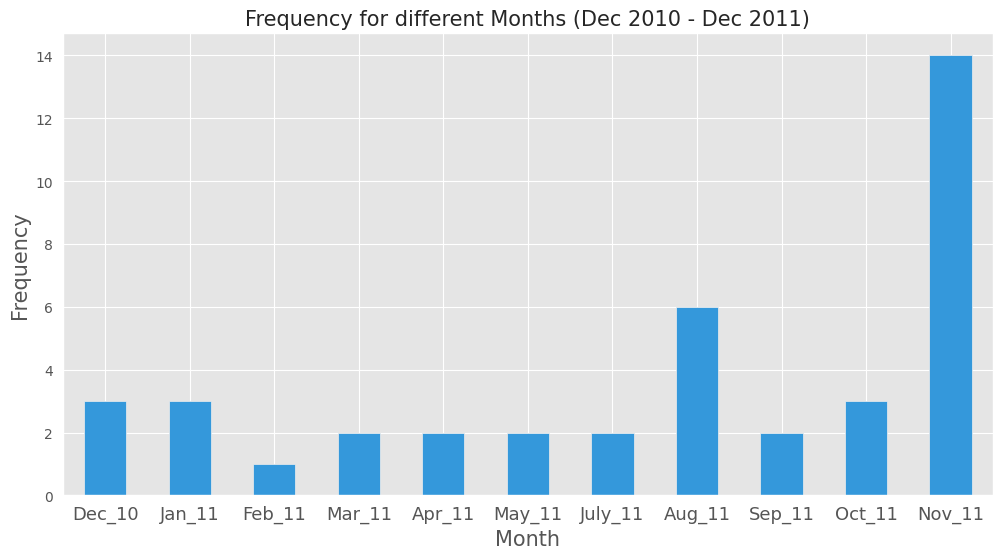

In [80]:
# Visualizing the distribution of free items
df_free = df2[df2.UnitPrice == 0]
df_free.year_month.value_counts().sort_index()
ax = df_free.year_month.value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color='#3498db')
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

**Seasonal Highs and Lows: There is a significant increase in frequency in November 2011, which could suggest a seasonal peak in activity—possibly due to holiday shopping for Black Friday or Cyber Monday if this data is from a retail context.**

**Mid-Year Activity: The frequency is relatively consistent from March to August, with a slight increase in May and a dip in July.**

**End of Year Increase: Starting in September, there is a noticeable uptrend leading up to the peak in November.**

**Beginning of Year: The activity in January is higher than in December, which may reflect post-holiday sales or an influx of new year purchases.**

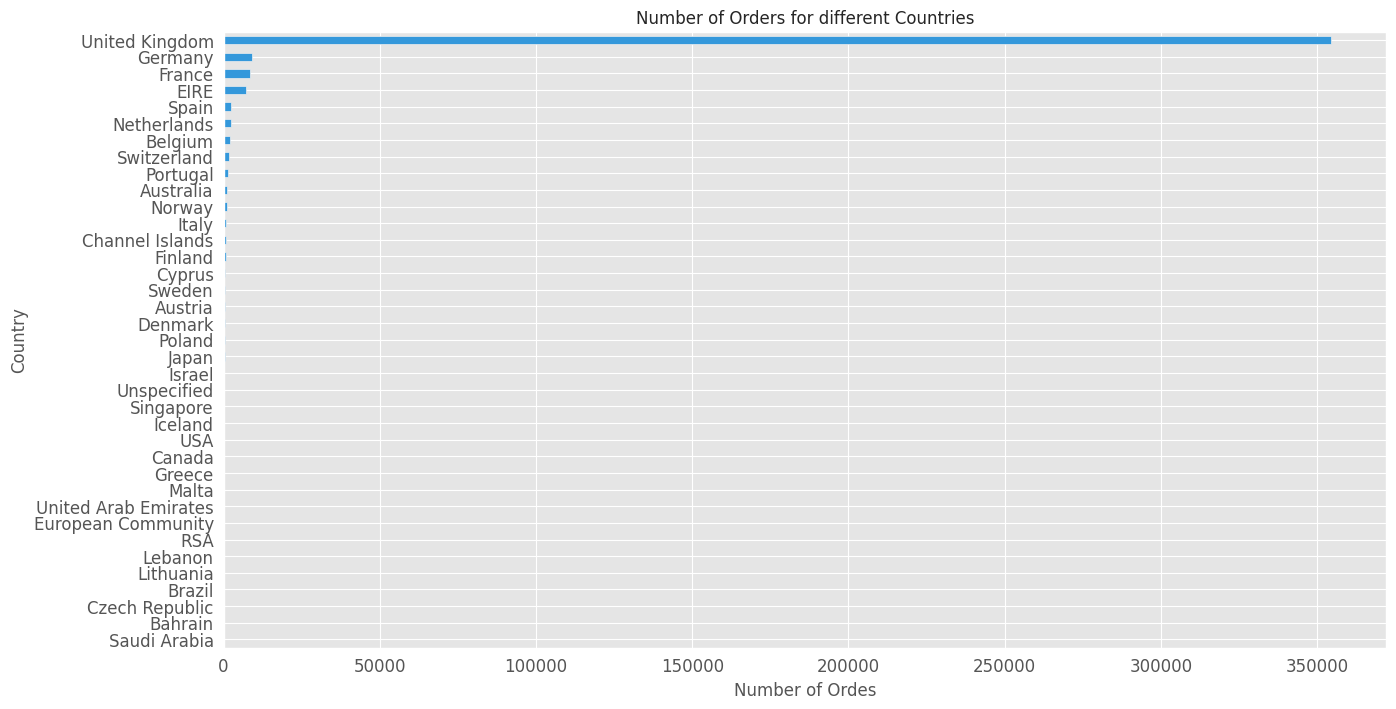

In [61]:
# visualizing unique customers in each country with UK
group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()
plt.subplots(figsize=(15, 8))
group_country_orders.plot(kind='barh', fontsize=12, color='#3498db')
plt.xlabel('Number of Ordes', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

**Market Concentration: The United Kingdom stands out as the country with the most orders by a significant margin, suggesting that the business is primarily UK-based or has a dominant market presence there.**

**Secondary Markets: Countries like Germany and France appear to be secondary markets, with a notable number of orders but substantially fewer than the UK.**

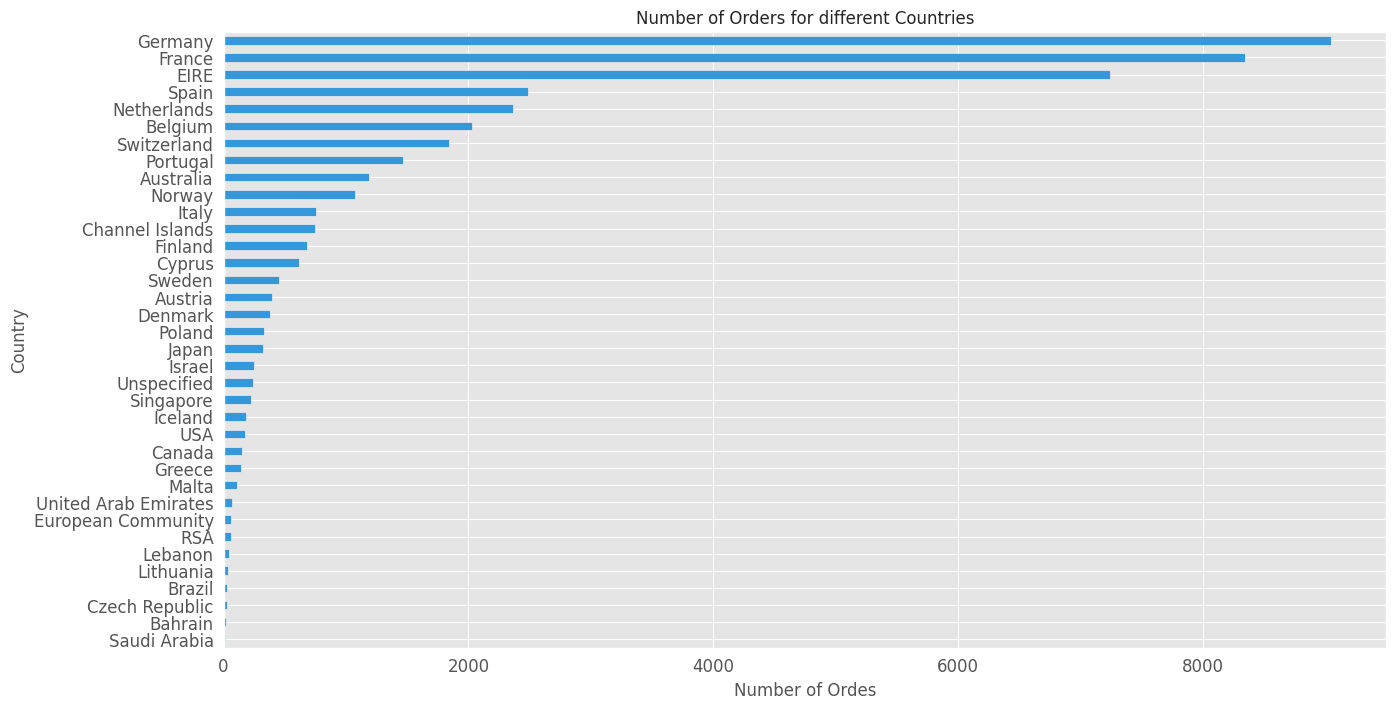

In [62]:
# visualizing unique customers in each country without UK
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']
plt.subplots(figsize=(15, 8))
group_country_orders_without_uk.plot(kind='barh', fontsize=12, color='#3498db')
plt.xlabel('Number of Ordes', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

**Secondary Markets: Countries like Germany and France are the next in line with a considerable number of orders, indicating these are important secondary markets for the business.**

**Global Reach: The business has a global customer base, with orders coming from various countries across Europe, as well as some from outside Europe, like Australia and the USA.**

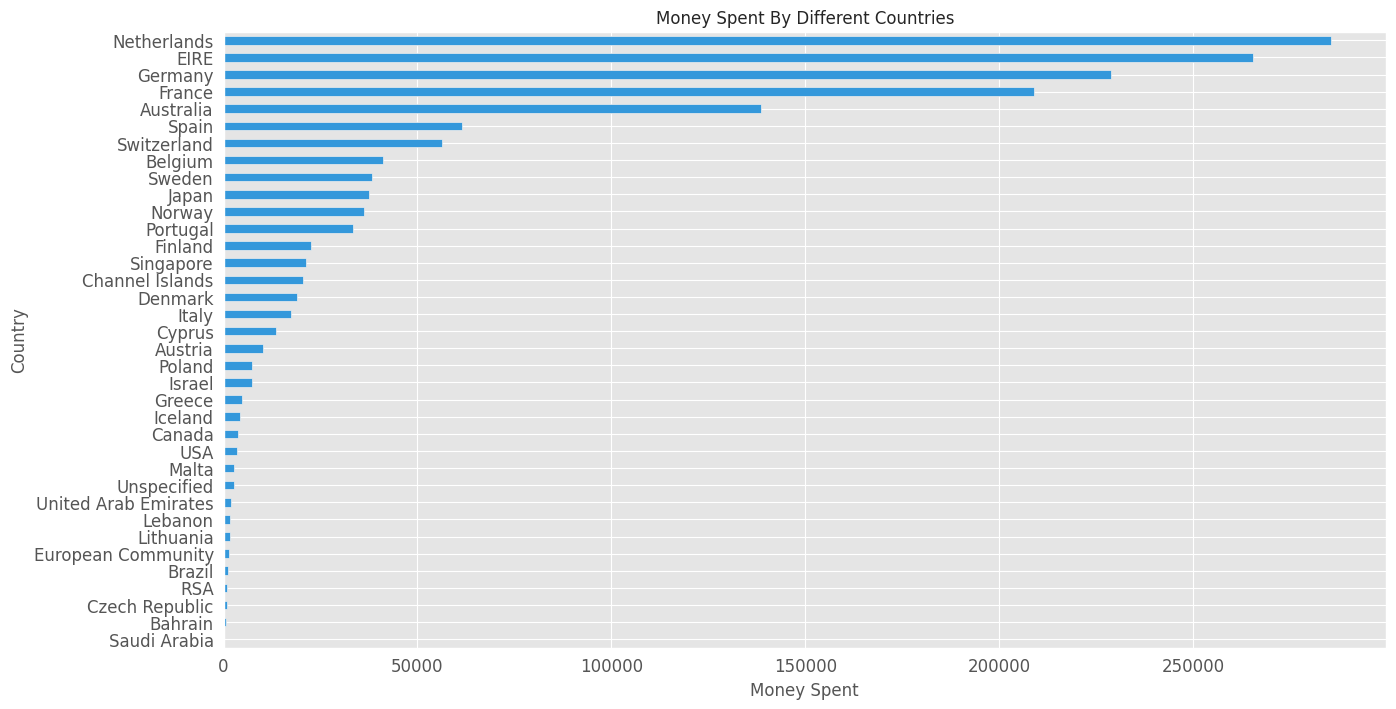

In [65]:
# Visualizing Amount spent by each country without UK
group_country_amount_spent = df2.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

plt.subplots(figsize=(15, 8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color='#3498db')
plt.xlabel('Money Spent', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent By Different Countries', fontsize=12)
plt.show()

**International Markets: Other countries following the UK in the ranking would show the business's reach into international markets. The length of each bar would give an idea of the market size or spending power of the customers from each country.**

<Figure size 2800x2800 with 0 Axes>

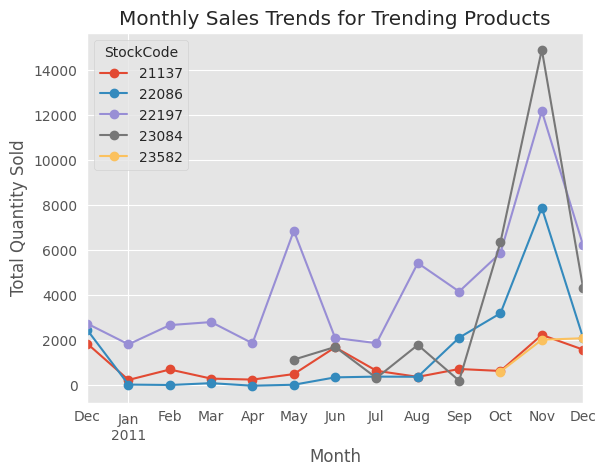

In [78]:
# Visualizing Item Trends
last_date = df['InvoiceDate'].max()
start_last_month = last_date - pd.offsets.MonthBegin(1)
last_month_data = df[df['InvoiceDate'] >= start_last_month] # Filter data for the last month
top_products_last_month = last_month_data.groupby('StockCode')['Quantity'].sum().reset_index() # Get the sum of quantities for each product in the last month
top_products_last_month = top_products_last_month.sort_values(by='Quantity', ascending=False)# Sort by quantity to find the top products
trending_products = top_products_last_month.head(5)# Assume top 5 products are considered trending
trending_products_df = df[df['StockCode'].isin(trending_products['StockCode'])] # Filter the original df to include only the trending products
monthly_sales_trends = trending_products_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum().unstack() # Group by month and stock code
plt.figure(figsize=(28, 28))
monthly_sales_trends.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends for Trending Products')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.legend(title='StockCode')
plt.show()


**Sales Peaks: Several products appear to have specific months where sales peak. This could be due to various factors such as sales promotions, seasonality, or stock availability.**

**Data Trends: The data may suggest trends that could inform inventory and marketing decisions, such as increasing stock ahead of expected peak months.**